In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# You need a Kaggle API key for this
# Can make one in your account settings
od.download("https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset")

Skipping, found downloaded files in "./sleep-health-and-lifestyle-dataset" (use force=True to force download)


In [ ]:
main_df = pd.read_csv("sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
main_df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [ ]:
main_df.replace("Normal Weight", "Normal", inplace=True)
main_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Hypothesis Testing Through ANOVA

*Null Hypothesis:* A person's BMI category does not have an effect on the person's heart rate.

*Alternative Hypothesis:* A person's BMI category will affect their heart rate.

(Assume $α=0.05$)

In [ ]:
BMI_dfs = main_df.groupby(['BMI Category'], dropna=False)
heart_rates = [k['Heart Rate'] for _, k in BMI_dfs]
anova_results = stats.f_oneway(*heart_rates)
anova_results.pvalue

1.3185477732384945e-38

As the p-value for the ANOVA test is lower than the level of statistical significance, we can conclude that a person's heart rate is affected by what BMI category they are in.

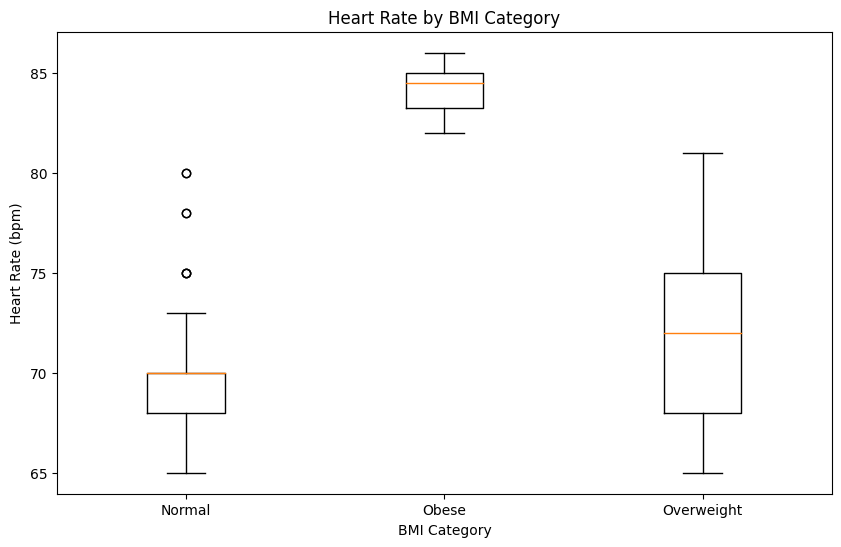

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
heart_rates = []
BMI_categories = []
for i, k in BMI_dfs:
  heart_rates.append(k['Heart Rate'])
  BMI_categories.append(k['BMI Category'].values[0])

plt.boxplot(heart_rates, labels=BMI_categories)
plt.title('Heart Rate by BMI Category')
plt.ylabel('Heart Rate (bpm)')
plt.xlabel('BMI Category')
plt.show()

# Hypothesis Testing Through T-Tests

High steps = steps > 5000

*Null Hypothesis:* There is no significant difference in sleep duration between individuals with high and low daily steps.

*Alternative Hypothesis:* There is a significant difference in sleep duration between individuals with high and low daily steps.

(Assume $α=0.05$)

In [ ]:
limit = 5000
high_steps_group = main_df[main_df['Daily Steps'] >= limit]['Sleep Duration']
low_steps_group = main_df[main_df['Daily Steps'] < limit]['Sleep Duration']

t_stat, p_value = stats.ttest_ind(high_steps_group, low_steps_group)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("In this case, we would reject the null hypothesis. There is a significant difference in sleep duration between high and low step groups.")
else:
    print("There is no significant difference in sleep duration between individuals with high and low daily steps.")

t-statistic: 2.445814907367563
p-value: 0.014915155800785463
In this case, we would reject the null hypothesis. There is a significant difference in sleep duration between high and low step groups.


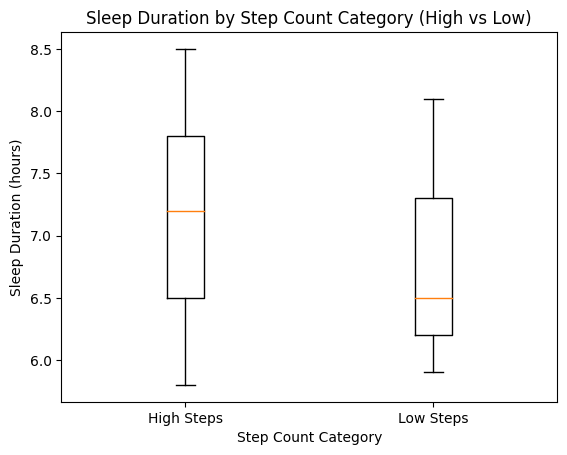

In [ ]:
plt.figure()
plt.boxplot([high_steps_group, low_steps_group], labels=['High Steps', 'Low Steps'])
plt.title('Sleep Duration by Step Count Category (High vs Low)')
plt.ylabel('Sleep Duration (hours)')
plt.xlabel('Step Count Category')
plt.show()

# Hypothesis Testing Through Chi-Squared Test

*Null Hypothesis:* A person's BMI category does not have an effect the person's likelihood of having a sleeping disorder

*Alternative Hypothesis:* A person's BMI category does have an effect the person's likelihood of having a sleeping disorder

(Assume $α=0.05$)

In [ ]:
bmi_category = main_df.loc[:, 'BMI Category']
sleeping_disorder = main_df['Sleep Disorder'].isna()
have_sd = {}

for index, value in sleeping_disorder.items():
  if value:
    have_sd[index] = 'No'
  else:
    have_sd[index] = 'Yes'

have_sd = pd.Series(have_sd)
table = pd.crosstab(bmi_category, have_sd, colnames=['Has Sleeping Disorder'])
table

Has Sleeping Disorder,No,Yes
BMI Category,,
Normal,200,16
Obese,0,10
Overweight,19,129


In [ ]:
res = stats.chi2_contingency(table)
res.pvalue

7.270524885184559e-54

The p-value is much smaller than the significane level of 0.05, thus we reject the null hypothesis. A person's BMI category does effect their likelihood of having a sleeping disorder.

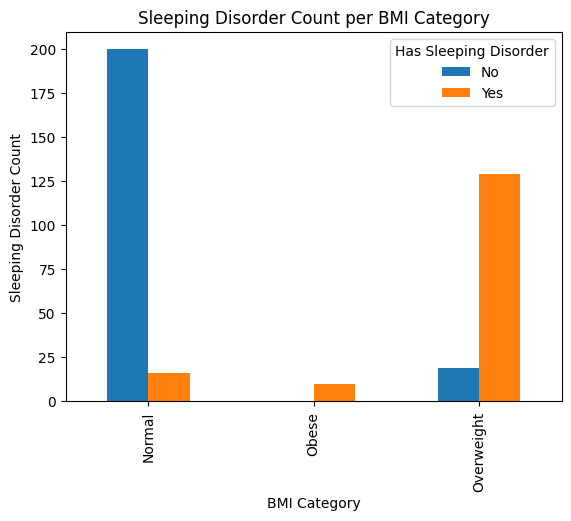

In [ ]:
plot = table.plot(kind="bar")
plt.ylabel('Sleeping Disorder Count')
plt.title('Sleeping Disorder Count per BMI Category')
plt.show()